<a href="https://colab.research.google.com/github/sakrbn/saeedkarbasian/blob/NLP/04_17_K_Means_Clustering_for_the_Movie_Reviews_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [3]:
fileids = movie_reviews.fileids()
fileids

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [4]:
len(fileids)

2000

In [5]:
movie_reviews.categories()

['neg', 'pos']

In [6]:
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [fileid.split('/')[0] for fileid in movie_reviews.fileids()]

In [7]:
documents[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [8]:
labels[0]

'neg'

In [9]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)
X = vectorizer.fit_transform(documents)

In [10]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [11]:
predicted_labels = kmeans.labels_
predicted_labels

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
ari_score = adjusted_rand_score(labels, predicted_labels)
print("ARI Score:", ari_score)

ARI Score: 0.04883985436633331


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


ARI Score: 0.04883985436633331


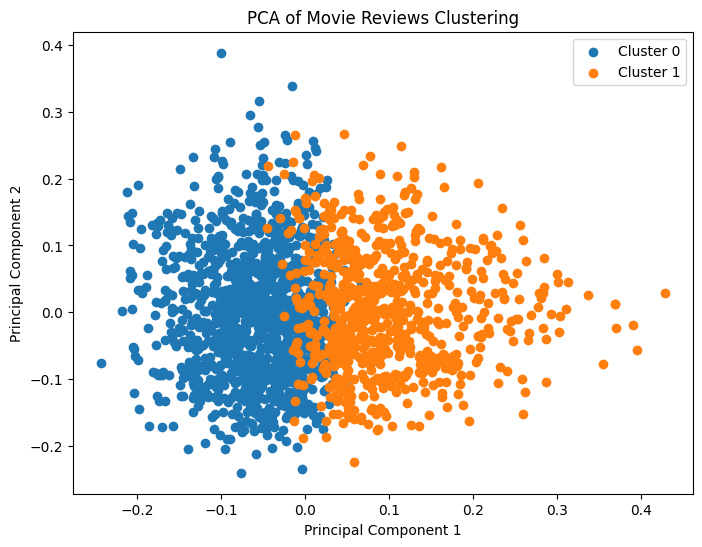

In [13]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
nltk.download('movie_reviews')
fileids = movie_reviews.fileids()
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [fileid.split('/')[0] for fileid in movie_reviews.fileids()]

# استخراج ویژگی‌ها
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(documents)

# خوشه‌بندی با K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
predicted_labels = kmeans.labels_

# محاسبه ARI Score
ari_score = adjusted_rand_score(labels, predicted_labels)
print("ARI Score:", ari_score)

# ترسیم نتایج
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[predicted_labels == i, 0], X_pca[predicted_labels == i, 1], label=f'Cluster {i}')
plt.title('PCA of Movie Reviews Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


ARI Score: 0.04883985436633331
Components: [[ 0.00217631  0.09737041 -0.00140815 ...  0.0242335  -0.01058231
  -0.05553369]
 [ 0.00017121  0.06707775  0.01054057 ...  0.01420486 -0.00576842
  -0.02217048]]


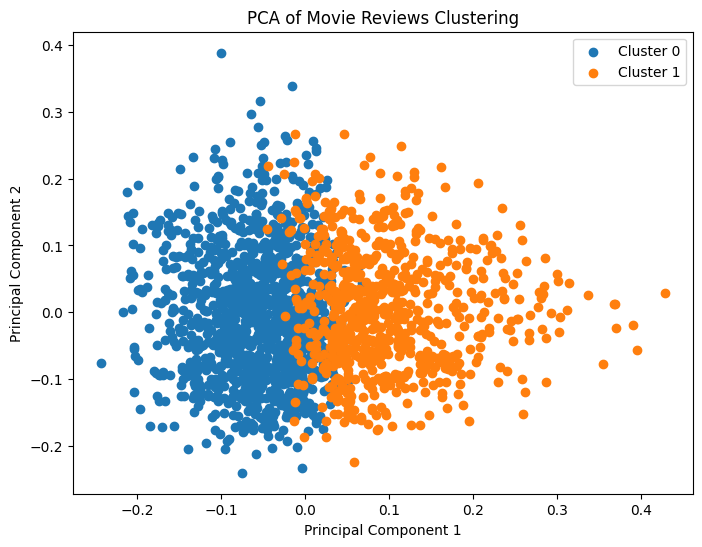

In [14]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
nltk.download('movie_reviews')
fileids = movie_reviews.fileids()
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [fileid.split('/')[0] for fileid in movie_reviews.fileids()]

# استخراج ویژگی‌ها
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(documents)

# خوشه‌بندی با K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
predicted_labels = kmeans.labels_

# محاسبه ARI Score
ari_score = adjusted_rand_score(labels, predicted_labels)
print("ARI Score:", ari_score)

# تبدیل داده‌ها به فضای دو بعدی با استفاده از PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# تفسیر دو ویژگی جدید
print("Components:", pca.components_)

# ترسیم نتایج
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[predicted_labels == i, 0], X_pca[predicted_labels == i, 1], label=f'Cluster {i}')
plt.title('PCA of Movie Reviews Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()